# TP3 - Text Mining

Installation de la librairie nltk

In [431]:
#!pip install nltk

Importation des différentes librairies:

In [432]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

On télécharge les listes de mots adéquats:

In [433]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

---
## Utilisation de NLTK

La première partie du TP consiste à vous familiariser avec la librairie NLTK et à appliquer ce que vous venez de voir en cours. Pour cette partie, vous utiliserez le texte ci-dessous.

In [434]:
text = """Privacy is necessary for an open society in the electronic age. Privacy is not secrecy. A private matter 
is something one doesn't want the whole world to know, but a secret matter is something one doesn't want anybody 
to know. Privacy is the power to selectively reveal oneself to the world."""

1. En utilisant nltk, découpez le *text* en phrase: **sent_tokenize()**

In [435]:
tokenized_text = sent_tokenize(text)
tokenized_text

['Privacy is necessary for an open society in the electronic age.',
 'Privacy is not secrecy.',
 "A private matter \nis something one doesn't want the whole world to know, but a secret matter is something one doesn't want anybody \nto know.",
 'Privacy is the power to selectively reveal oneself to the world.']

2. Découpez le *text* en token/mot: **word_tokenize()**




In [436]:
tokenized_word = word_tokenize(text)
tokenized_word

['Privacy',
 'is',
 'necessary',
 'for',
 'an',
 'open',
 'society',
 'in',
 'the',
 'electronic',
 'age',
 '.',
 'Privacy',
 'is',
 'not',
 'secrecy',
 '.',
 'A',
 'private',
 'matter',
 'is',
 'something',
 'one',
 'does',
 "n't",
 'want',
 'the',
 'whole',
 'world',
 'to',
 'know',
 ',',
 'but',
 'a',
 'secret',
 'matter',
 'is',
 'something',
 'one',
 'does',
 "n't",
 'want',
 'anybody',
 'to',
 'know',
 '.',
 'Privacy',
 'is',
 'the',
 'power',
 'to',
 'selectively',
 'reveal',
 'oneself',
 'to',
 'the',
 'world',
 '.']

3. Calculez la distribution de fréquence des mots à partir du résultat précédent: **FreqDist()** et **most_common()**

In [437]:
fdist = FreqDist(tokenized_word)
fdist.most_common()

[('is', 5),
 ('the', 4),
 ('.', 4),
 ('to', 4),
 ('Privacy', 3),
 ('matter', 2),
 ('something', 2),
 ('one', 2),
 ('does', 2),
 ("n't", 2),
 ('want', 2),
 ('world', 2),
 ('know', 2),
 ('necessary', 1),
 ('for', 1),
 ('an', 1),
 ('open', 1),
 ('society', 1),
 ('in', 1),
 ('electronic', 1),
 ('age', 1),
 ('not', 1),
 ('secrecy', 1),
 ('A', 1),
 ('private', 1),
 ('whole', 1),
 (',', 1),
 ('but', 1),
 ('a', 1),
 ('secret', 1),
 ('anybody', 1),
 ('power', 1),
 ('selectively', 1),
 ('reveal', 1),
 ('oneself', 1)]

4. Quel mot est le plus utilisé? Quel mot est utilisé 3 fois ?

In [438]:
fdist.most_common(1)
# le mot est le plus utilisé : is
# le mot est utilisé 3 fois : Privacy

[('is', 5)]

5. Tracer la distribution de fréquence des mots: **FreqDist().plot()**

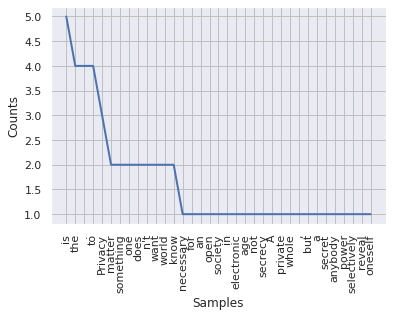

In [439]:
# Frequency plot
fdist.plot()

Téléchargez les stopwords et affichez les:

In [440]:
# Download
stop_words = set(stopwords.words("english"))

# Print it
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

6. Supprimez les stopwords de tokenized_word. Vous devez faire une boucle sur cette liste. Affichez le *text* original versus le *text* filtré.

In [441]:
# Loop over tokenized_word
def delete_stop_words(tokenized_word):
  for word in tokenized_word:
    if word in stop_words:
      tokenized_word.remove(word)
print(tokenized_word)
delete_stop_words(tokenized_word)
print(tokenized_word)

['Privacy', 'is', 'necessary', 'for', 'an', 'open', 'society', 'in', 'the', 'electronic', 'age', '.', 'Privacy', 'is', 'not', 'secrecy', '.', 'A', 'private', 'matter', 'is', 'something', 'one', 'does', "n't", 'want', 'the', 'whole', 'world', 'to', 'know', ',', 'but', 'a', 'secret', 'matter', 'is', 'something', 'one', 'does', "n't", 'want', 'anybody', 'to', 'know', '.', 'Privacy', 'is', 'the', 'power', 'to', 'selectively', 'reveal', 'oneself', 'to', 'the', 'world', '.']
['Privacy', 'necessary', 'an', 'open', 'society', 'electronic', 'age', '.', 'Privacy', 'not', 'secrecy', '.', 'A', 'private', 'matter', 'something', 'one', "n't", 'want', 'the', 'whole', 'world', 'know', ',', 'a', 'secret', 'matter', 'something', 'one', "n't", 'want', 'anybody', 'know', '.', 'Privacy', 'the', 'power', 'selectively', 'reveal', 'oneself', 'the', 'world', '.']


**Exemple:** la cellule suivante montre comment réaliser la lemmatisation et le stemming sur le mot 'flying'.

In [442]:
# Load Lemmatization
lem = WordNetLemmatizer()
# Load Stemming
ps = PorterStemmer()

word = "flying"
print("Lemmatized Word:", lem.lemmatize(word,"v"))
print("Stemmed Word:", ps.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


7. Réalisez du stemming sur les tokens sans les stopwords obtenus précédemment. **Tips:** comme précédemment vous pouvez faire une boucle.

In [443]:
# Stemming
stemming_tokenized_word = []
print(tokenized_word)
for word in tokenized_word:
  stemming_tokenized_word.append(ps.stem(word))
print(stemming_tokenized_word)

['Privacy', 'necessary', 'an', 'open', 'society', 'electronic', 'age', '.', 'Privacy', 'not', 'secrecy', '.', 'A', 'private', 'matter', 'something', 'one', "n't", 'want', 'the', 'whole', 'world', 'know', ',', 'a', 'secret', 'matter', 'something', 'one', "n't", 'want', 'anybody', 'know', '.', 'Privacy', 'the', 'power', 'selectively', 'reveal', 'oneself', 'the', 'world', '.']
['privaci', 'necessari', 'an', 'open', 'societi', 'electron', 'age', '.', 'privaci', 'not', 'secreci', '.', 'A', 'privat', 'matter', 'someth', 'one', "n't", 'want', 'the', 'whole', 'world', 'know', ',', 'a', 'secret', 'matter', 'someth', 'one', "n't", 'want', 'anybodi', 'know', '.', 'privaci', 'the', 'power', 'select', 'reveal', 'oneself', 'the', 'world', '.']


8. En partant des mêmes tokens qu'à la question précédentes, réalisez cette fois-ci la lemmatisation. Qu'observez-vous?

In [444]:
# Lemmatization
lemmatization_tokenized_word = []
print(tokenized_word)
for word in tokenized_word:
  lemmatization_tokenized_word.append(lem.lemmatize(word))
print(lemmatization_tokenized_word)

# Pour la Lemmatization, nous avons besoin de présicer le type de mot 'verbe, nom, adjectif...etc'


['Privacy', 'necessary', 'an', 'open', 'society', 'electronic', 'age', '.', 'Privacy', 'not', 'secrecy', '.', 'A', 'private', 'matter', 'something', 'one', "n't", 'want', 'the', 'whole', 'world', 'know', ',', 'a', 'secret', 'matter', 'something', 'one', "n't", 'want', 'anybody', 'know', '.', 'Privacy', 'the', 'power', 'selectively', 'reveal', 'oneself', 'the', 'world', '.']
['Privacy', 'necessary', 'an', 'open', 'society', 'electronic', 'age', '.', 'Privacy', 'not', 'secrecy', '.', 'A', 'private', 'matter', 'something', 'one', "n't", 'want', 'the', 'whole', 'world', 'know', ',', 'a', 'secret', 'matter', 'something', 'one', "n't", 'want', 'anybody', 'know', '.', 'Privacy', 'the', 'power', 'selectively', 'reveal', 'oneself', 'the', 'world', '.']


## Sentiment Analyses
Dans cette seconde partie du TP, vous allez utiliser NLTK pour préparer les données et créer une matrice document terme TF-IDF. Vous pourrez alors réaliser une étude de classification basée sur l'analyse de sentiments.

In [445]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import seaborn as sns

Téléchargez les données:

In [446]:
# Download reviews dataset 
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: /content/reviews.csv
100% 7.17M/7.17M [00:00<00:00, 179MB/s]


9. Créez un dataframe appelé *df* à partir du fichier *reviews.csv*.

In [447]:
# Read reviews
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


10.1. Séléctionnez uniquement les colonnes 'content' et 'score'. Affichez quelques lignes du dataframe.

In [448]:
# Select only relevant columns
mycolumns = ['content','score']
content_score = df[mycolumns]
content_score

,content,score
0,Update: After getting a response from the deve...,1
1,Used it for a fair amount of time without any ...,1
2,Your app sucks now!!!!! Used to be good but no...,1
3,"It seems OK, but very basic. Recurring tasks n...",1
4,Absolutely worthless. This app runs a prohibit...,1
...,...,...
15741,I believe that this is by far the best app wit...,5
15742,It sometimes crashes a lot!!,5
15743,Works well for what I need,5
15744,Love it.,5


10.2. Tracez la distribution de la variable score en utilisant la fonction **countplot()**  de Seaborn

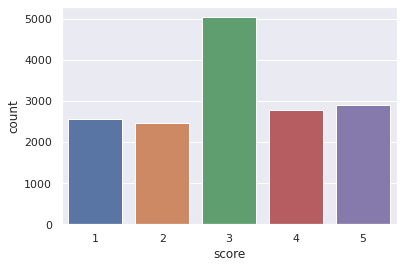

In [449]:
# Countplot
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="score", data=content_score)

**Note:** en regardant la distribution des scores, on voit que les classes sont déséquilibrées. On décide de garder les données ainsi pour l'instant, le but du TP étant autre. Mais ce n'est pas la manière optimale de traiter ce type de problème. Nous devrions à minima faire de l'undersampling.

### TF-IDF

11. Utilisez la fonction **[TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)** puis **fit_transform()** pour créer la matrice document terme TF-IDF associée à la colonne 'content'.

In [450]:
# Create the TF-IDF matrix
vectorizer = TfidfVectorizer()
TF_IDF = vectorizer.fit_transform(df['content'])
TF_IDF.shape

(15746, 11242)

12. Découpez le dataframe en trainset et testset: 70/30%. **Tips:** utilisez la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [451]:
# Train / Test split with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(TF_IDF, df['score'],  test_size=0.30, random_state=42)

13. Utilisez le modèle **[MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)** pour classer les phrases.
Entraînez ce classifier Bayésien **.fit()** et faites la prédiction **.predict()** sur le jeu de test. Vous pouvez obtenir l'accuracy du modèle avec la fonction: [metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [452]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.41045723962743436

### TF-IDF with stemming
14. Vous allez refaire la même étude mais cette fois-ci en supprimant les stopwords. Vous obtiendrez une nouvelle collection de mots sur lesquels vous réaliserez du stemming. Enfin, réentraîner un classifier bayésien. **Tips:** utilisez les boucles que vous avez utilisés précédemment pour préparer le texte.

 Est-ce que l'accuracy est meilleure ?

In [453]:
# Tokenization
print('Avant traitement ')
print(content_score)
print('Après traitement ')
for i in range(0,len(content_score['content'])) :
  tokenized_phrase = word_tokenize(content_score['content'][i])

  # Delete stopwords
  delete_stop_words(tokenized_phrase)
  
  # Stemming
  for j in range(0,len(tokenized_phrase)):
    tokenized_phrase[j] = ps.stem(tokenized_phrase[j])

  # Recreate the sentence
  phrase = " ".join(tokenized_phrase)
  content_score['content'][i] = phrase

print(content_score)

Avant traitement 
                                                 content  score
0      Update: After getting a response from the deve...      1
1      Used it for a fair amount of time without any ...      1
2      Your app sucks now!!!!! Used to be good but no...      1
3      It seems OK, but very basic. Recurring tasks n...      1
4      Absolutely worthless. This app runs a prohibit...      1
...                                                  ...    ...
15741  I believe that this is by far the best app wit...      5
15742                       It sometimes crashes a lot!!      5
15743                         Works well for what I need      5
15744                                           Love it.      5
15745  Really amazing and helped me sooo much just i ...      5

[15746 rows x 2 columns]
Après traitement 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                                                 content  score
0      updat : after get respons the develop I would ...      1
1      use for fair amount time without problem . sud...      1
2      your app suck ! ! ! ! ! use be good now n't up...      1
3      It seem OK , veri basic . recur task need work...      1
4      absolut worthless . thi app run prohibit clunk...      1
...                                                  ...    ...
15741  I believ thi by far best app help ppl keep tra...      5
15742                           It sometim crash lot ! !      5
15743                              work well what I need      5
15744                                             love .      5
15745  realli amaz help sooo much i hope it be sharab...      5

[15746 rows x 2 columns]


In [454]:
# Create the TF-IDF matrix

vectorizer = TfidfVectorizer()
TF_IDF = vectorizer.fit_transform(content_score['content'])
TF_IDF.shape

(15746, 8367)

In [455]:
# Train / Test split with the same random_state
X_train, X_test, y_train, y_test = train_test_split(TF_IDF, content_score['score'],  test_size=0.30, random_state=42)

In [456]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.41998306519898393

### TF-IDF with discretization
15. Discrétisez les valeurs de *score* comme suit:  
- [1,2] => 0
- [3]    => 1
- [4,5] => 2

Le score de 0 correspond alors a un avis négatif, 1 a un avis neutre et 2 a un avis positif.


In [457]:
content_score_final = content_score

print(content_score['score'])
for i in range (0, len(content_score_final['score'])):
  if content_score_final['score'][i] in[1,2]:
    content_score_final['score'][i] = 0
  if content_score_final['score'][i] == 3:
    content_score_final['score'][i] = 1
  if content_score_final['score'][i] in [4,5]:
    content_score_final['score'][i] = 2

content_score_final['score']

0        1
1        1
2        1
3        1
4        1
        ..
15741    5
15742    5
15743    5
15744    5
15745    5
Name: score, Length: 15746, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


0        0
1        0
2        0
3        0
4        0
        ..
15741    2
15742    2
15743    2
15744    2
15745    2
Name: score, Length: 15746, dtype: int64

16. Tracer la distribution de cette nouvelle distribution de la variable *score*. Utilisez la librairie Seaborn et la fonction **countplot()**.

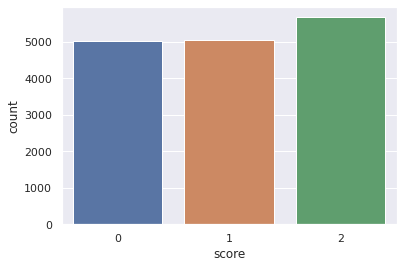

In [458]:
# Plot
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="score", data=content_score_final)

La distribution n'est toujours pas totalement équilibrée mais cela reste plus raisonnable.

17. En réalisant les mêmes étapes qu'à la question 14, réalisez une nouvelle classification avec la nouvelle variable *score* discrétisée.  
Quelle est la nouvelle accuracy ? 

In [459]:
vectorizer = TfidfVectorizer()
TF_IDF = vectorizer.fit_transform(content_score['content'])
TF_IDF.shape

X_train, X_test, y_train, y_test = train_test_split(TF_IDF, content_score['score'],  test_size=0.30, random_state=42)

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.6598221845893311